# importação da bibliotecas

In [3]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix
import pandas as pd
from google.colab.patches import cv2_imshow

In [2]:
#Atualizando a lib mlxtend
!pip install mlxtend --upgrade --no-deps

     |████████████████████████████████| 1.3 MB 3.2 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


# Descompactando o dataset

In [1]:
#necessário fazer o upload do dataset no formato .zip
!unzip /content/PetImages.zip

Archive:  /content/PetImages.zip
   creating: PetImages reduzido/Cat/
  inflating: PetImages reduzido/Cat/0.jpg  
  inflating: PetImages reduzido/Cat/1.jpg  
  inflating: PetImages reduzido/Cat/10.jpg  
  inflating: PetImages reduzido/Cat/11.jpg  
  inflating: PetImages reduzido/Cat/12.jpg  
  inflating: PetImages reduzido/Cat/13.jpg  
  inflating: PetImages reduzido/Cat/14.jpg  
  inflating: PetImages reduzido/Cat/15.jpg  
  inflating: PetImages reduzido/Cat/16.jpg  
  inflating: PetImages reduzido/Cat/17.jpg  
  inflating: PetImages reduzido/Cat/18.jpg  
  inflating: PetImages reduzido/Cat/19.jpg  
  inflating: PetImages reduzido/Cat/2.jpg  
  inflating: PetImages reduzido/Cat/20.jpg  
  inflating: PetImages reduzido/Cat/21.jpg  
  inflating: PetImages reduzido/Cat/22.jpg  
  inflating: PetImages reduzido/Cat/23.jpg  
  inflating: PetImages reduzido/Cat/24.jpg  
  inflating: PetImages reduzido/Cat/25.jpg  
  inflating: PetImages reduzido/Cat/26.jpg  
  inflating: PetImages reduzido/C

# convertendo as imagens para arquivo de dados

In [5]:
dir = "/content/PetImages"
categories = ['Cat', 'Dog']
data = []
for category in categories:
    path = os.path.join(dir,category)
    label = categories.index(category)
    
    for img in os.listdir(path):
        imgpath = os.path.join(path,img)
        pet_img = cv2.imread(imgpath,0) # 0=gray 1=color
        try:
            pet_img = cv2.resize(pet_img,(50,50))#calculate the 50 percent of original dimensions (width, height)
            image = np.array(pet_img).flatten()
            data.append([image,label])
            
        except Exception as e:
            pass
    

# gravando arquivo de dados 

In [ ]:
#pick_in = open('data_cat_dog.pickle','wb')
#pickle.dump(data,pick_in)
#pick_in.close()

# carregando arquivo de dados

In [ ]:
#pick_in = open('data_cat_dog.pickle','rb')
#data = pickle.load(pick_in)
#pick_in.close()

# dividindo o arquivo de dados em X(features) e y(labels)

In [6]:
features = []
labels = []
for feature, label in data:
    features.append(feature)
    labels.append(label)
    

In [ ]:
print(len(features))

80


In [ ]:
print(len(labels))

80


# criando o modelo

In [7]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.10)
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

# salvando o modelo treinado

In [ ]:
#pick_model = open('model.sav','wb')
#pickle.dump(model,pick_model)
#pick_in.close()

##pick_in = open('model.pickle','rb')
#model = pickle.load(pick_in)
#pick_in.close()

# métricas

[[0 4]
 [2 2]]
              precision    recall  f1-score   support

         Cat       0.00      0.00      0.00         4
         Dog       0.33      0.50      0.40         4

    accuracy                           0.25         8
   macro avg       0.17      0.25      0.20         8
weighted avg       0.17      0.25      0.20         8



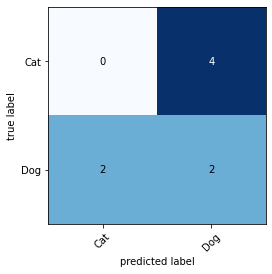

In [9]:
predictions = model.predict(X_test)
accuracy = model.score(X_test, y_test)

#mapeando as classes
class_mapping = {
    0:"Cat",
    1:"Dog"
}

#aplicando o mapeamento, convertendo de [0,1,0,1....] p/ ["Cat", "Dog", "Cat", "Dog".....]
df_ytest=pd.DataFrame(y_test)
df_ytest[0]=df_ytest[0].map(class_mapping)
mapped_ytest=df_ytest.values

#aplicando o mapeamento, convertendo de [0,1,0,1....] p/ ["Cat", "Dog", "Cat", "Dog".....]
df_pred=pd.DataFrame(predictions)
df_pred[0]=df_pred[0].map(class_mapping)
mapped_predictions=df_pred.values

import seaborn as sns
cf_matrix = confusion_matrix(mapped_ytest, mapped_predictions)


print(confusion_matrix(y_test, predictions))
print(classification_report(mapped_ytest, mapped_predictions))
fig, ax=plot_confusion_matrix(conf_mat=cf_matrix, class_names= ['Cat', 'Dog'])
plt.show()

# fazendo predição

In [ ]:
!unzip /content/predict.zip

Dog


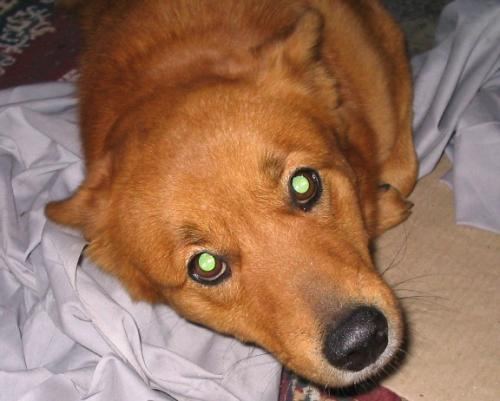

Cat


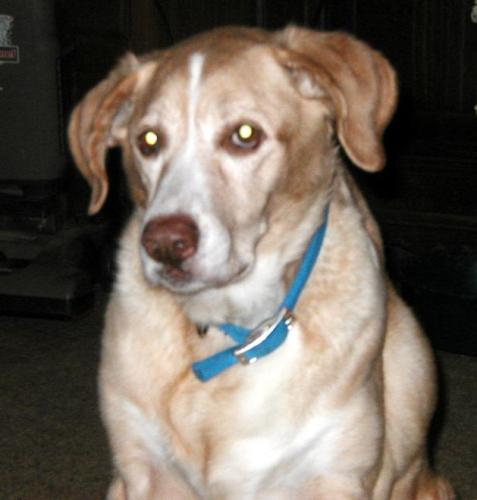

Dog


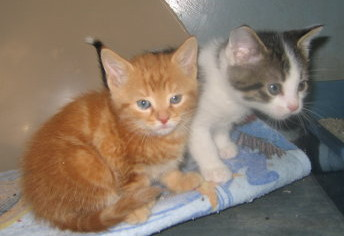

Cat


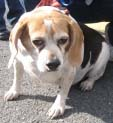

Cat


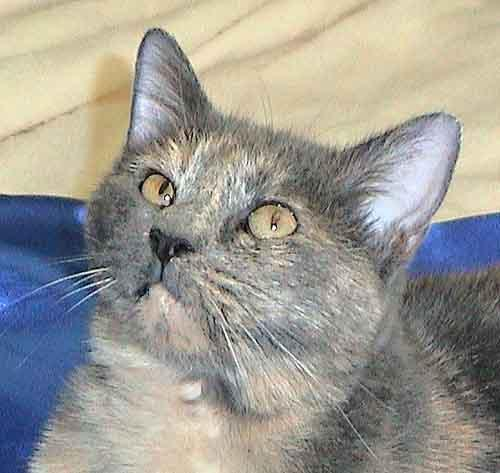

Dog


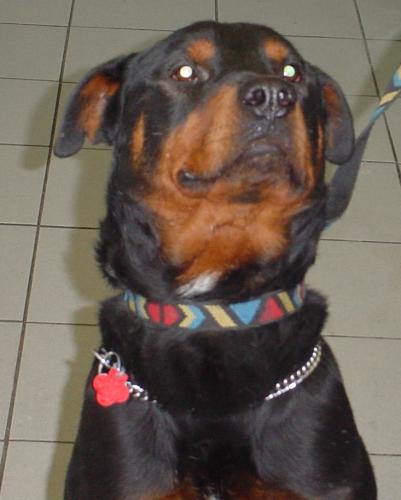

Dog


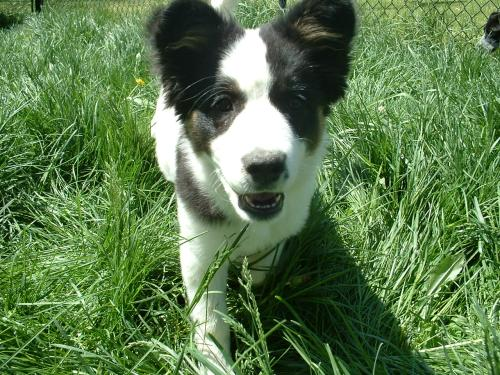

Dog


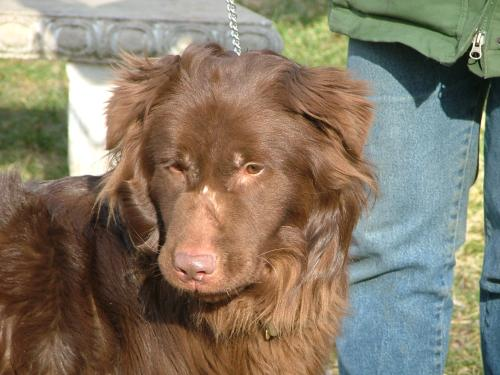

Dog


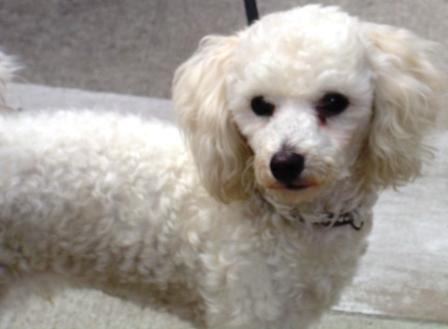

Cat


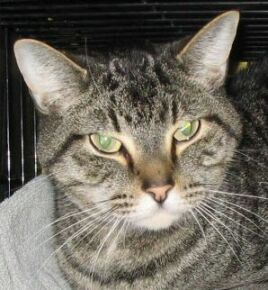

Cat


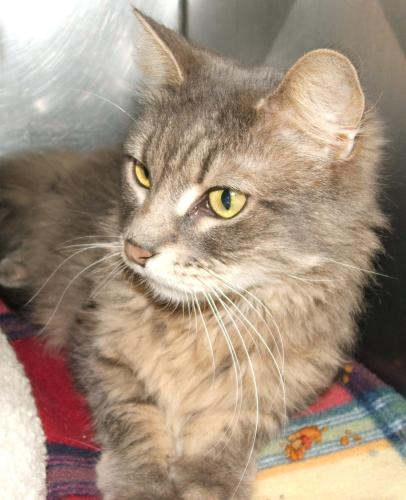

Dog


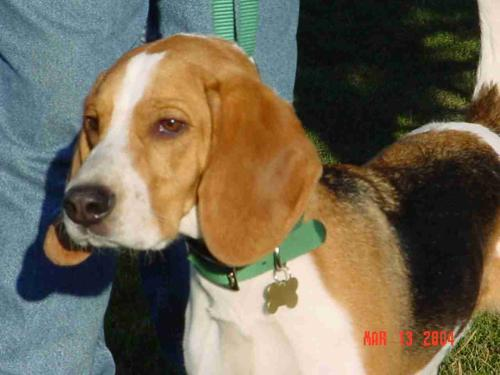

Cat


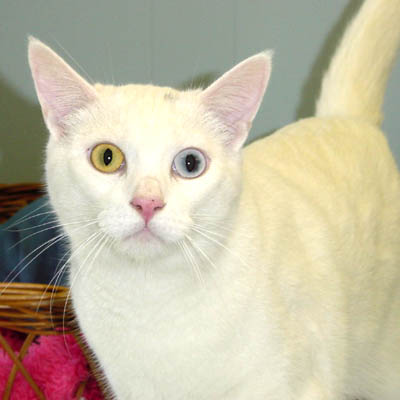

Dog


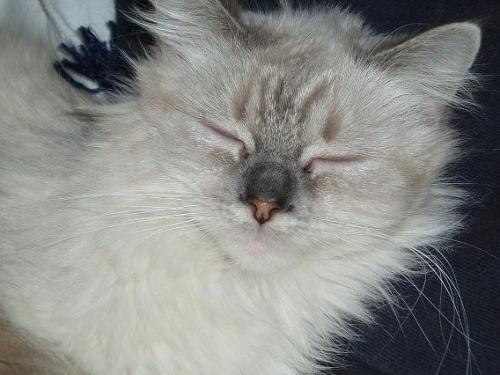

Cat


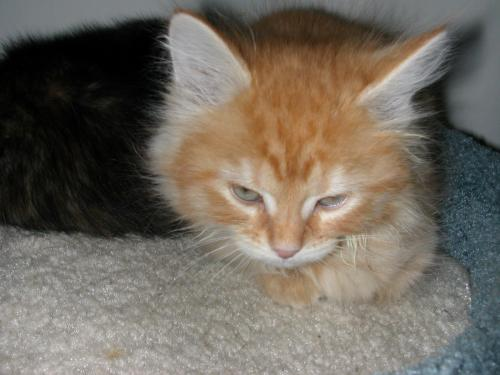

Cat


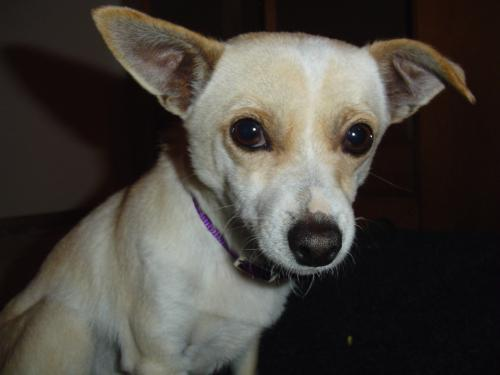

Dog


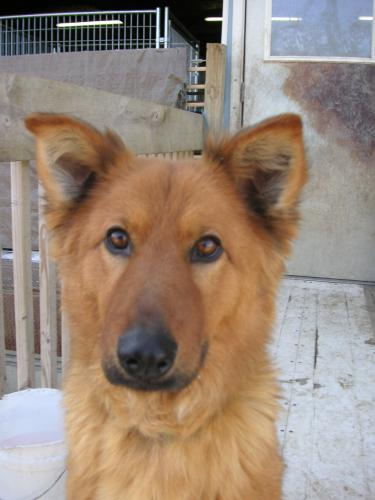

Cat


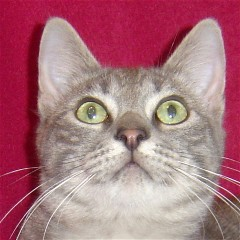

Cat


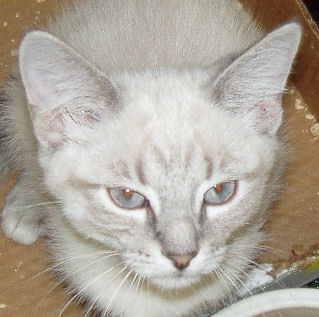

Dog


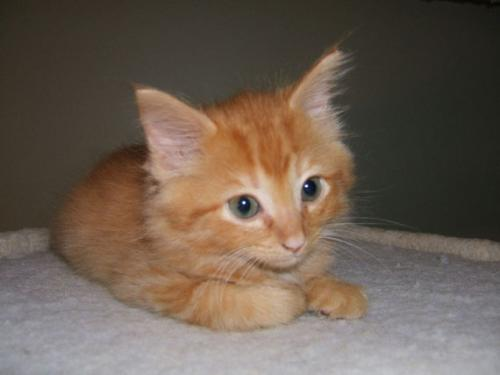

In [10]:
dir = "/content/PetImages/predict"
data1 = []
predictX = []
index = 0
for img in os.listdir(dir):
    imgpath = os.path.join(dir,img)
    pet_img = cv2.imread(imgpath,0) # 0=gray 1=color
    try:
        pet_img = cv2.resize(pet_img,(50,50)) #50 percent of original dimensions (width, height)
        image = np.array(pet_img).flatten()
        data1.append([image])
        print(categories[int(model.predict(data1[index]))])
        original_pet_img=cv2.imread(imgpath,1)
        cv2_imshow(original_pet_img)
        index += 1
            
    except Exception as e:
        pass